<a href="https://colab.research.google.com/github/Shiblu31/ScabAI/blob/main/after_pro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_height, img_width = 224, 224  # VGG16 expects 224x224
batch_size = 32
epochs = 10
base_path = '/content/drive/MyDrive/DATASET/scabies_6/Train'

In [ ]:
# Data Augmentation + Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2]
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 184 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze all VGG16 layers

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stop, checkpoint],
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.5919 - loss: 0.7576 

6/6 ━━━━━━━━━━━━━━━━━━━━ 170s 28s/step - accuracy: 0.5990 - loss: 0.7474 - val_accuracy: 0.6304 - val_loss: 0.5895
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.7683 - loss: 0.5120 

6/6 ━━━━━━━━━━━━━━━━━━━━ 193s 28s/step - accuracy: 0.7734 - loss: 0.5054 - val_accuracy: 0.6957 - val_loss: 0.5152
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.8176 - loss: 0.3822 

6/6 ━━━━━━━━━━━━━━━━━━━━ 208s 28s/step - accuracy: 0.8235 - loss: 0.3759 - val_accuracy: 0.7609 - val_loss: 0.4300
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 187s 26s/step - accuracy: 0.9220 - loss: 0.2713 - val_accuracy: 0.7609 - val_loss: 0.4081
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.9693 - loss: 0.2036 

6/6 ━━━━━━━━━━━━━━━━━━━━ 148s 25s/step - accuracy: 0.9690 - loss: 0.2021 - val_accuracy: 0.8696 - val_loss: 0.2932
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 211s 27s/step - accuracy: 0.9843 - loss: 0.1581 - val_accuracy: 0.8261 - val_loss: 0.2924
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.9593 - loss: 0.1483 

6/6 ━━━━━━━━━━━━━━━━━━━━ 153s 26s/step - accuracy: 0.9612 - loss: 0.1452 - val_accuracy: 0.9130 - val_loss: 0.2192
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.9934 - loss: 0.0965 

6/6 ━━━━━━━━━━━━━━━━━━━━ 211s 28s/step - accuracy: 0.9928 - loss: 0.0957 - val_accuracy: 0.9348 - val_loss: 0.2248
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 151s 27s/step - accuracy: 1.0000 - loss: 0.0724 - val_accuracy: 0.8913 - val_loss: 0.1735
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 213s 28s/step - accuracy: 1.0000 - loss: 0.0728 - val_accuracy: 0.9348 - val_loss: 0.1899


2/2 ━━━━━━━━━━━━━━━━━━━━ 30s 10s/step
Confusion Matrix:
 [[22  0]
 [ 4 20]]

Classification Report:
               precision    recall  f1-score   support

Not Infected       0.85      1.00      0.92        22
    Infected       1.00      0.83      0.91        24

    accuracy                           0.91        46
   macro avg       0.92      0.92      0.91        46
weighted avg       0.93      0.91      0.91        46



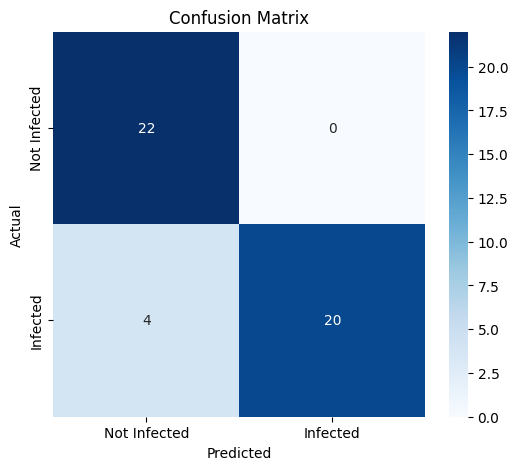

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on validation set
val_generator.reset()
y_pred = model.predict(val_generator)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# True labels
y_true = val_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=['Not Infected', 'Infected']))

# Optional: Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Infected', 'Infected'], yticklabels=['Not Infected', 'Infected'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


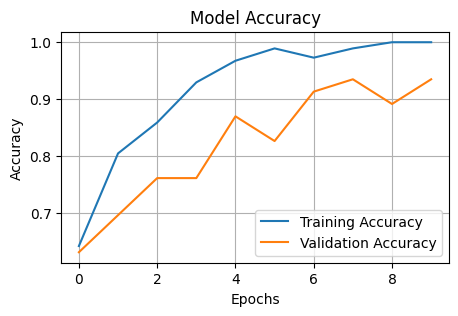

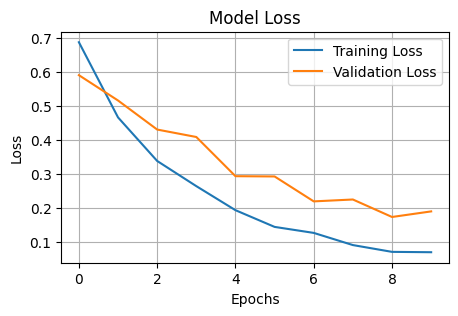

In [ ]:
import matplotlib.pyplot as plt

# Assuming you stored training result like this:
# history = model.fit(...)

# Plot Accuracy
plt.figure(figsize=(5, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
